In [90]:
!pip install wordcloud

# ----------------------------------------------------------
# Importing Libraries
# ----------------------------------------------------------
import numpy as np                  # Numerical operations
import pandas as pd                 # Data manipulation
import matplotlib.pyplot as plt     # Visualization
%matplotlib inline

from wordcloud import WordCloud     # WordCloud generator

import nltk                         # Natural Language Toolkit
from nltk.corpus import stopwords   # Stopwords list

# ----------------------------------------------------------
# Downloading NLTK Data
# ----------------------------------------------------------
nltk.download('stopwords')
nltk.download('punkt')

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Python314\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahe.SHAHEER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahe.SHAHEER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
df = pd.read_csv('enron_spam_data.csv', encoding='latin1')

In [92]:
df.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [5]:
#4. Data Cleaning

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [94]:
df.drop(columns = ['Message ID', 'Date',], inplace = True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Subject   33427 non-null  object
 1   Message   33345 non-null  object
 2   Spam/Ham  33716 non-null  object
dtypes: object(3)
memory usage: 790.3+ KB


In [96]:
  # Rename the columns name
df.rename(columns = {'Spam/Ham': 'Target'}, inplace = True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  33427 non-null  object
 1   Message  33345 non-null  object
 2   Target   33716 non-null  object
dtypes: object(3)
memory usage: 790.3+ KB


In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Subject,Message,Target
0,christmas tree farm pictures,NaN,0
1,"vastar resources , inc .","gary , production from the high island larger ...",0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0
3,re : issue,fyi - see note below - already done .\nstella\...,0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0


In [99]:
#checking missing values
df.isnull().sum()

Subject    289
Message    371
Target       0
dtype: int64

In [100]:
df = df.dropna(subset=['Subject', 'Message'])



In [101]:
df.isnull().sum()


Subject    0
Message    0
Target     0
dtype: int64

In [102]:
df.duplicated().sum()

np.int64(3071)

In [17]:
df = df.drop_duplicates(keep = 'first')

In [103]:
df.duplicated().sum()

np.int64(3071)

In [104]:
df.shape

(33107, 3)

In [105]:
df = df[df['Target'].isin([0, 1])]

In [106]:
df = df.reset_index(drop=True)

In [107]:
df.shape


(33107, 3)

In [108]:
#EDA

In [109]:
values = df['Target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 49.81725918989942
percentage of 1 : 50.182740810100576


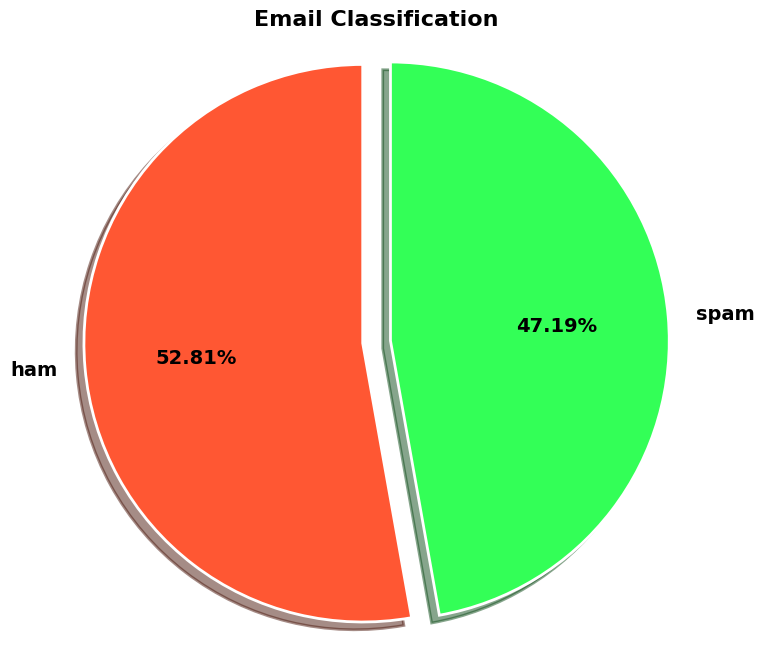

In [25]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


In [110]:
import nltk

# --------------------------
# 1. Combine Subject + Message into one text field
# --------------------------
df['text'] = df['Subject'] + " " + df['Message']

# --------------------------
# 2. Feature Engineering
# --------------------------
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# --------------------------
# 3. Describe features for entire dataset
# --------------------------
df[['num_characters', 'num_words', 'num_sentence']].describe()

# --------------------------
# 4. Describe features for Target = 0
# --------------------------
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

# --------------------------
# 5. Describe features for Target = 1
# --------------------------
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,16614.000000,16614.000000,16614.000000
mean,1339.041772,267.742988,18.765439
std,1967.201086,390.314306,42.742795
min,4.000000,2.000000,1.000000
25%,364.000000,74.000000,6.000000
50%,665.000000,140.000000,11.000000
75%,1417.000000,283.000000,21.000000
max,28756.000000,8401.000000,3093.000000


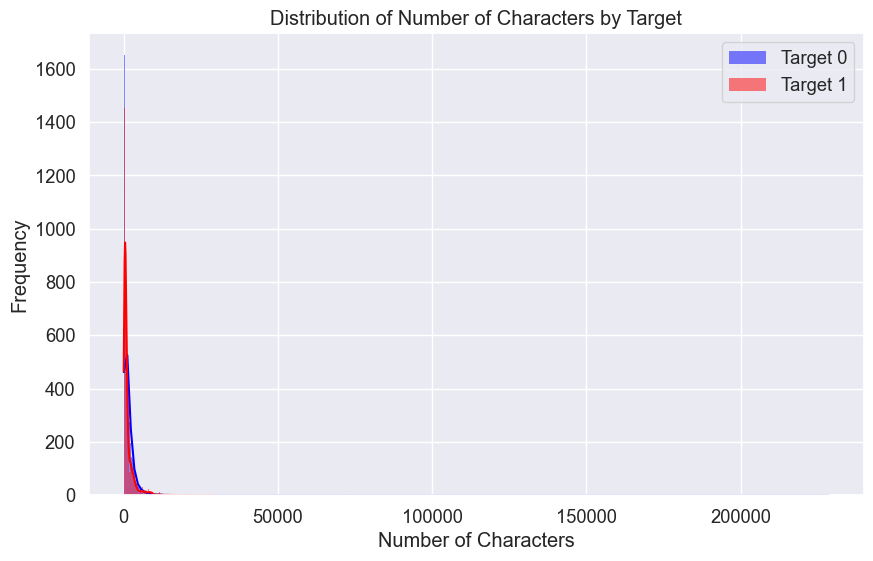

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters by Target')
plt.legend()
sns.set(style='whitegrid')
plt.show()



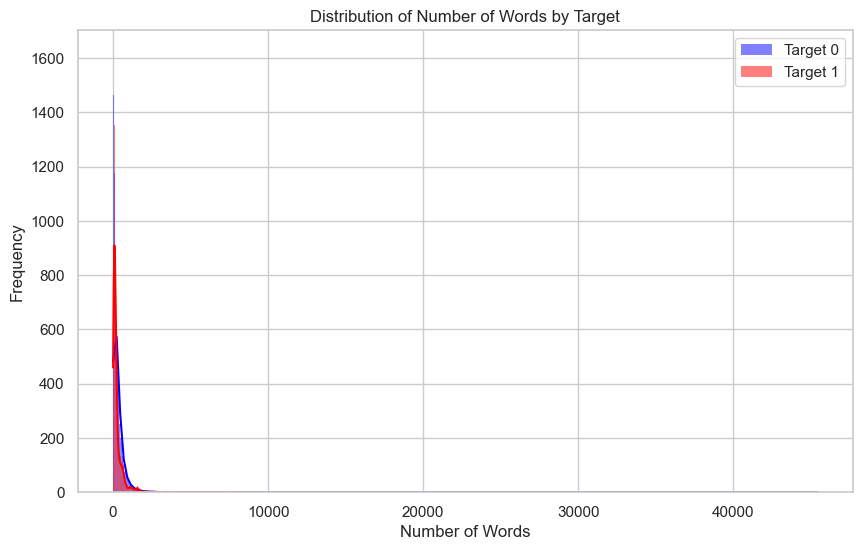

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)
sns.histplot(df[df['Target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words by Target')
plt.legend()
sns.set(style='whitegrid')
plt.show()


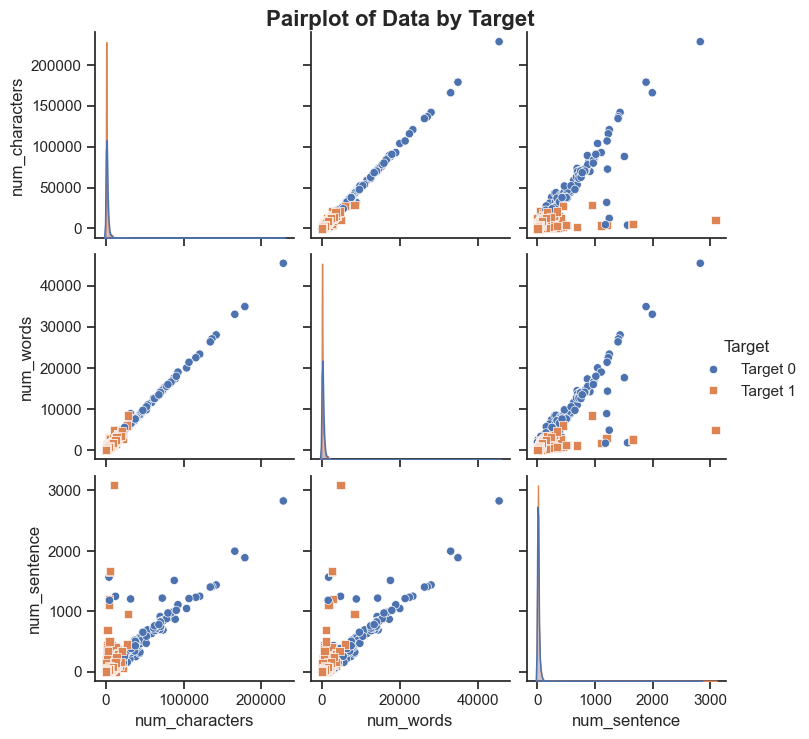

In [29]:
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df[['num_characters', 'num_words', 'num_sentence', 'Target']],
                 hue='Target', diag_kind='kde', markers=["o", "s"])

g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)

g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

plt.show()


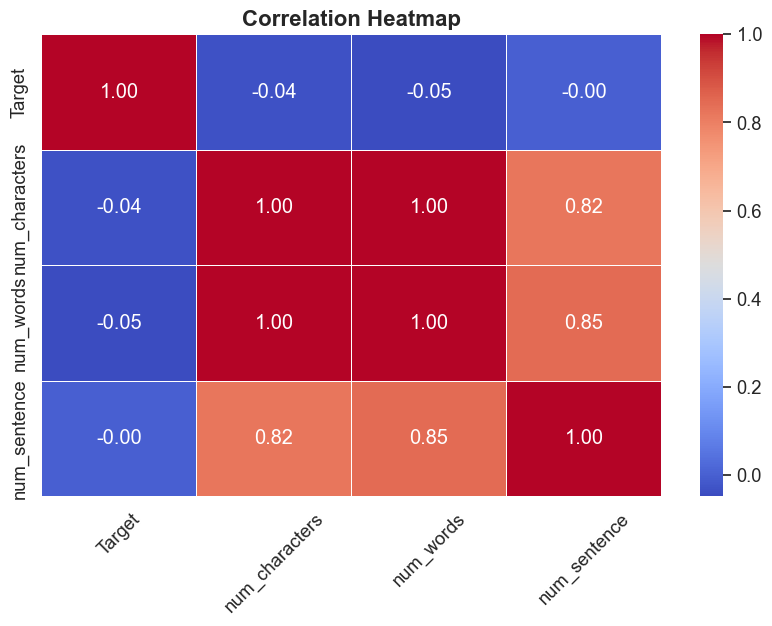

In [30]:
correlation_matrix = df[['Target', 'num_characters', 'num_words', 'num_sentence']].corr()

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [113]:
#6. Data Preprocessing

In [114]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Initialize Stemmer
ps = PorterStemmer()

# OPTIMIZATION: Load stopwords once globally to speed up processing
stop_words_set = set(stopwords.words('english'))

def transform_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Tokenization
    text = nltk.word_tokenize(text)
    
    # 3. Removing special characters (Keep only alphanumeric)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Update text and clear y
    text = y[:]
    y.clear()
    
    # 4. Removing Stopwords & Punctuation
    for i in text:
        # Check against the pre-loaded set
        if i not in stop_words_set and i not in string.punctuation:
            y.append(i)
            
    # Update text and clear y
    text = y[:]
    y.clear()
    
    # 5. Stemming (Walking -> Walk)
    for i in text:
        y.append(ps.stem(i))
    
    # Return as a string
    return " ".join(y)

# -----------------------------------------------------------
# CRITICAL STEP: Apply this to your existing dataframe
# -----------------------------------------------------------
# This creates the final clean column for your model
df['transformed_text'] = df['text'].apply(transform_text)

# Check the result
print(df.head())

                        Subject  \
0      vastar resources , inc .   
1  calpine daily gas nomination   
2                    re : issue   
3     meter 7268 nov allocation   
4      mcmullen gas for 11 / 99   

                                             Message  Target  \
0  gary , production from the high island larger ...       0   
1             - calpine daily gas nomination 1 . doc       0   
2  fyi - see note below - already done .\nstella\...       0   
3  fyi .\n- - - - - - - - - - - - - - - - - - - -...       0   
4  jackie ,\nsince the inlet to 3 river plant is ...       0   

                                                text  num_characters  \
0  vastar resources , inc . gary , production fro...            4307   
1  calpine daily gas nomination - calpine daily g...              67   
2  re : issue fyi - see note below - already done...            1182   
3  meter 7268 nov allocation fyi .\n- - - - - - -...            1150   
4  mcmullen gas for 11 / 99 jackie ,\nsince 

In [33]:
#Word Cloud for Spam Messages

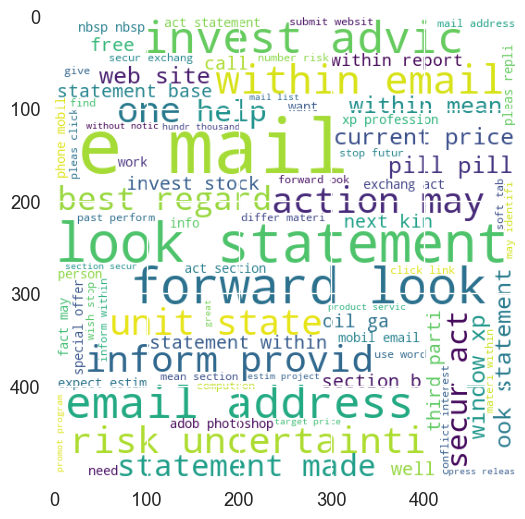

In [34]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

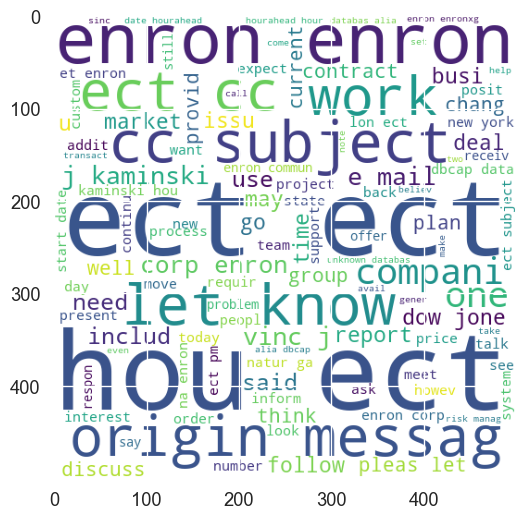

In [35]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [36]:
#Find top 100 words of spam

In [37]:
spam_carpos = []
for sentence in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [38]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(100))

C:\Users\shahe.SHAHEER\AppData\Local\Temp\ipykernel_4216\1901151432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette='bright')


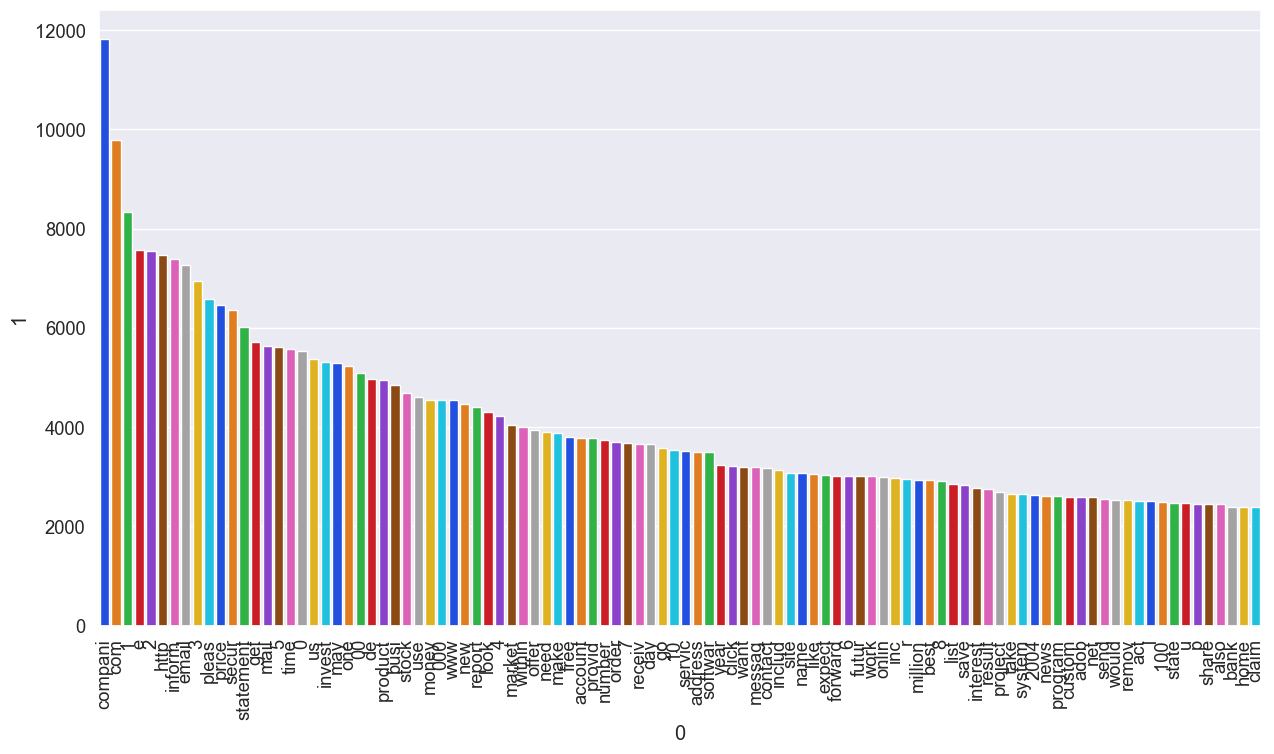

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size (Width, Height) in inches
plt.figure(figsize=(15, 8)) 

sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette='bright')
plt.xticks(rotation=90)
plt.show()

In [40]:
#Find top 30 words of Not spam Messages

In [41]:
ham_carpos = []
for sentence in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [42]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(100))

C:\Users\shahe.SHAHEER\AppData\Local\Temp\ipykernel_4216\1901711814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


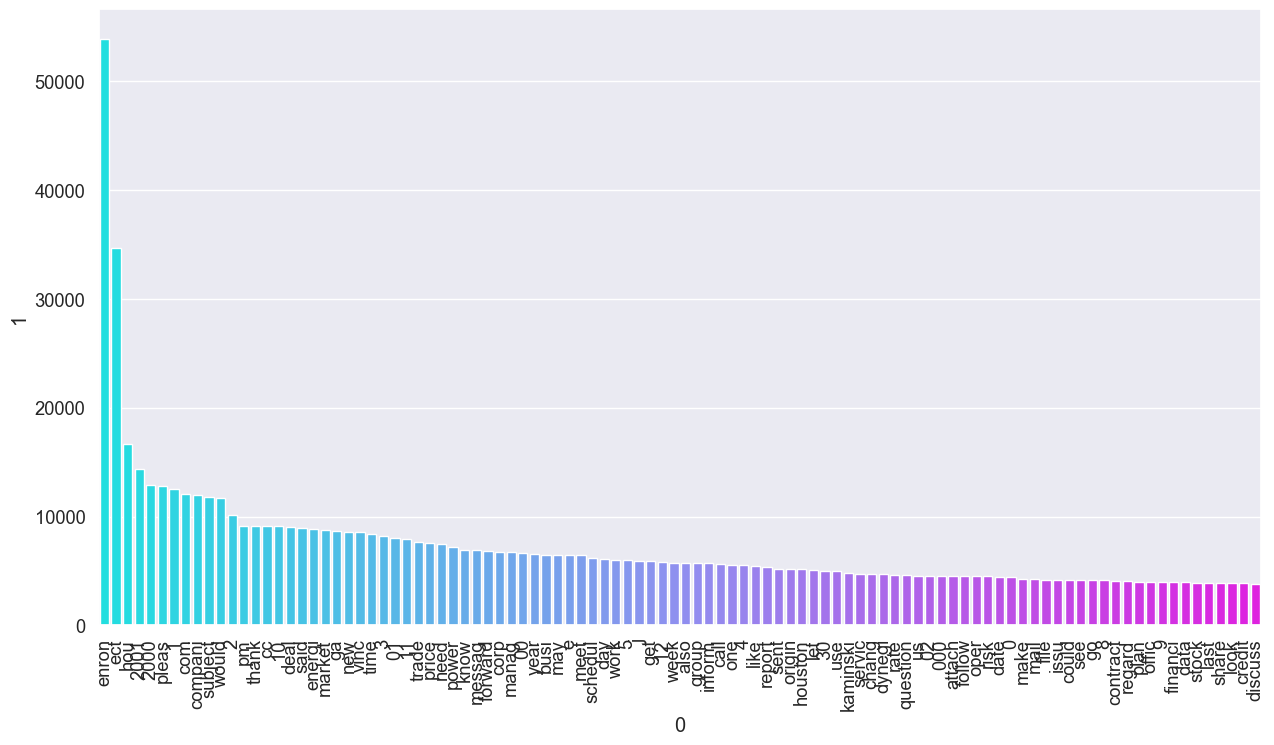

In [43]:
plt.figure(figsize=(15, 8)) 
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

In [44]:
''' Spam emails are rarely unique. They are sent in bulk, often with slight variations. If Email A is spam, and Email B is 90% similar to Email A, Email B is likely spam too.

Build a Network: Create a graph where every email is a node. Connect them if they are similar.

Extract Network Metrics:

Degree: Is this email connected to many others? (Spam campaigns cluster together).

PageRank: Is this email central to a cluster?

Train Classifier: Feed these new "network features" into your Random Forest model alongside your existing length features. '''

' Spam emails are rarely unique. They are sent in bulk, often with slight variations. If Email A is spam, and Email B is 90% similar to Email A, Email B is likely spam too.\n\nBuild a Network: Create a graph where every email is a node. Connect them if they are similar.\n\nExtract Network Metrics:\n\nDegree: Is this email connected to many others? (Spam campaigns cluster together).\n\nPageRank: Is this email central to a cluster?\n\nTrain Classifier: Feed these new "network features" into your Random Forest model alongside your existing length features. '

In [45]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [46]:
# 1. PREPARE DATA (Using a sample to manage Graph complexity)

In [47]:
df.shape


(30036, 8)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30036 entries, 0 to 30035
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Subject           30036 non-null  object
 1   Message           30036 non-null  object
 2   Target            30036 non-null  int64 
 3   text              30036 non-null  object
 4   num_characters    30036 non-null  int64 
 5   num_words         30036 non-null  int64 
 6   num_sentence      30036 non-null  int64 
 7   transformed_text  30036 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.8+ MB


In [49]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
# --- CRITICAL IMPORT FIX ---
from scipy.sparse import hstack, csr_matrix

In [70]:
df_sample = df.copy()
# 4. Prepare Features for Training
print("Vectorizing Text & Combining Features...")
# A. Text Features (TF-IDF)
tfidf_final = TfidfVectorizer(max_features=5000)
X_text = tfidf_final.fit_transform(df_sample['transformed_text'])

# B. Numerical Features (Length + Graph)
# Ensure we convert this to a sparse matrix so it matches the text data format
X_num = df_sample[['num_characters', 'num_words']].values
X_num_sparse = csr_matrix(X_num)

# C. Combine
X_combined = hstack((X_text, X_num_sparse))
y = df_sample['Target']
print('Done')

Vectorizing Text & Combining Features...
Done


In [71]:
# 5. Train & Evaluate All Models
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=2)

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')

In [72]:
clfs = {
    'NB': mnb, 'DT': dtc, 'LR': lrc, 
    'RF': rfc, 'BgC': bc, 'ETC': etc, 'XGB': xgb
}

In [73]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

accuracy_scores = []
precision_scores = []

print("\nTraining Models...")
for name, clf in clfs.items():
    acc, prec = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For {name}: Accuracy: {acc:.4f}, Precision: {prec:.4f}")
    accuracy_scores.append(acc)
    precision_scores.append(prec)


Training Models...
For NB: Accuracy: 0.9650, Precision: 0.9572
For DT: Accuracy: 0.8584, Precision: 0.7798
For LR: Accuracy: 0.9832, Precision: 0.9734
For RF: Accuracy: 0.9854, Precision: 0.9817
For BgC: Accuracy: 0.9700, Precision: 0.9674
For ETC: Accuracy: 0.9880, Precision: 0.9872


C:\Users\shahe.SHAHEER\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [17:38:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For XGB: Accuracy: 0.9795, Precision: 0.9671


In [74]:
# 6. Plot Results
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Accuracy', ascending=False)

print("\nTop Models:")
print(performance_df)


Top Models:
  Algorithm  Accuracy  Precision
5       ETC  0.988016   0.987157
3        RF  0.985353   0.981705
2        LR  0.983189   0.973415
6       XGB  0.979527   0.967119
4       BgC  0.970040   0.967440
0        NB  0.965047   0.957177
1        DT  0.858356   0.779801


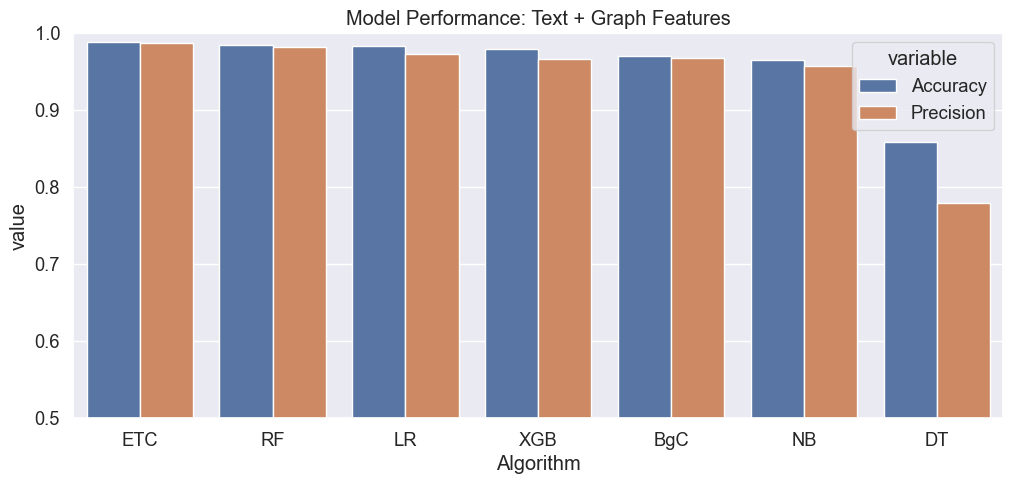

In [75]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")
plt.figure(figsize=(12, 5))
sns.barplot(x='Algorithm', y='value', hue='variable', data=performance_df1)
plt.title("Model Performance: Text + Graph Features")
plt.ylim(0.5, 1.0)
plt.show()


In [76]:
import pickle

# 1. Train the Best Model (ETC) on all data
# We use the same split as before for consistency
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

# 2. Save the files
# We need to save the vectorizer (tfidf_final) and the model (etc)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_final, f)  # Save the TF-IDF configuration

with open('model.pkl', 'wb') as f:
    pickle.dump(etc, f)          # Save the trained Extra Trees model

print("Success! Model and Vectorizer saved.")
print(f"Final ETC Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Success! Model and Vectorizer saved.
Final ETC Accuracy: 0.9880


In [77]:
# Get all feature names
tfidf_features = tfidf_final.get_feature_names_out()
numeric_features = ['num_characters', 'num_words']

feature_names = list(tfidf_features) + numeric_features


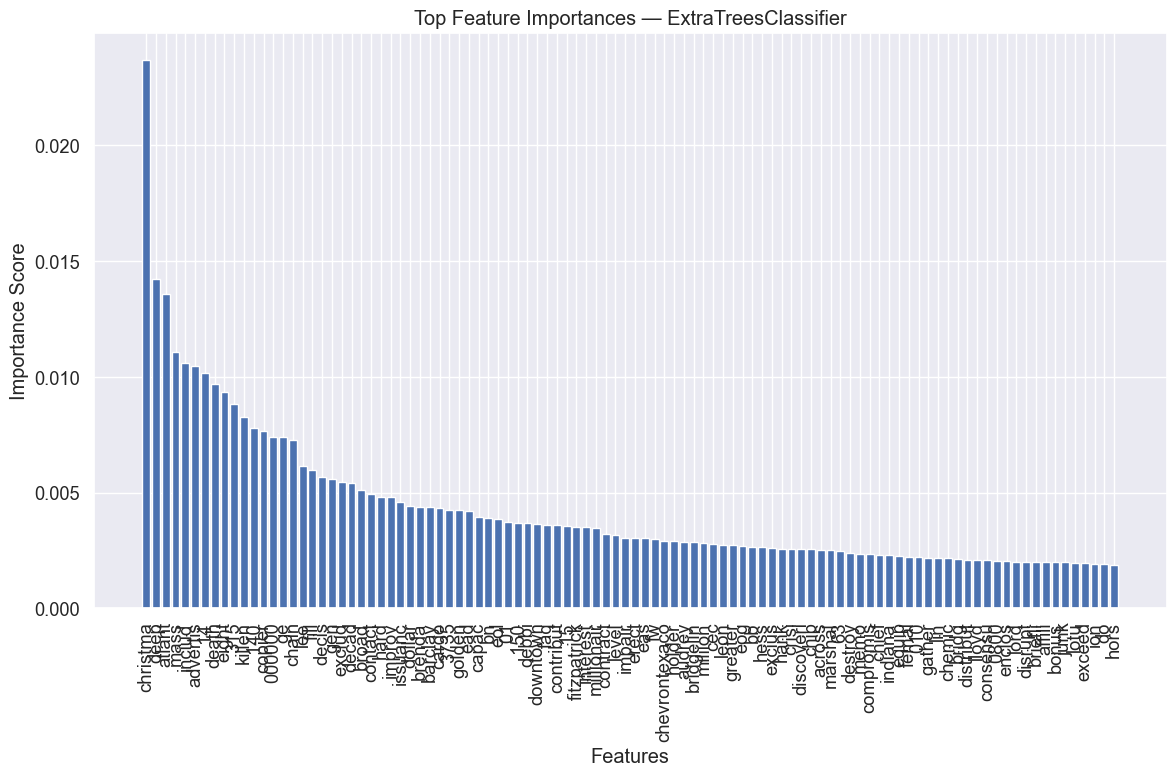

In [79]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]   # sort descending

TOP_N = 100  # number of top features to show

plt.figure(figsize=(12, 8))
plt.title("Top Feature Importances — ExtraTreesClassifier")
plt.bar(range(TOP_N), importances[indices][:TOP_N])
plt.xticks(range(TOP_N), [feature_names[i] for i in indices[:TOP_N]], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [80]:
#Step 1 — Build TF-IDF Vectors for Similarity Graph

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_final = TfidfVectorizer(max_features=5000)
X_text = tfidf_final.fit_transform(df_sample['transformed_text'])


In [122]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [83]:
#Step 2 — Compute Similarity Score With Known SPAM Emails

In [ ]:
import pandas as pd
from scipy.sparse import vstack

# Load data
df_sample = df.copy()

# Assume you already have tfidf_final fitted
X_text = tfidf_final.transform(df_sample['transformed_text'])

# Replace 'Target' with your actual label column
spam_mask = df_sample['Target'] == 1  # boolean Series
spam_indices = spam_mask[spam_mask].index   # get integer indices

# Filter rows in sparse matrix
from scipy.sparse import vstack
spam_vectors = X_text[spam_indices, :]


In [124]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def similarity_score(email_text):
    vec = tfidf_final.transform([email_text])
    sims = cosine_similarity(vec, spam_vectors)
    return float(np.max(sims))


In [125]:
#Step 3 — Combine ML Prediction + Similarity Score

In [128]:
import pickle

# Load the saved vectorizer and model
with open('vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


In [130]:
def final_spam_score(email_text):
    # 1. ML model score
    vec = tfidf_final.transform([email_text])
    X_num = np.array([[len(email_text), len(email_text.split())]])
    X_num_sparse = csr_matrix(X_num)
    vec_comb = hstack((vec, X_num_sparse))
    
    ml_prob = model.predict_proba(vec_comb)[0][1]   # spam probability
    
    # 2. Similarity score
    sim = similarity_score(email_text)
    
    # 3. Weighted final score
    final_score = 0.6 * ml_prob + 0.4 * sim
    
    return ml_prob, sim, final_score


In [131]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_similarity(email_text):
    vec = tfidf_final.transform([email_text])
    sims = cosine_similarity(vec, spam_vectors)[0]
    
    # Get top 5 most similar spam emails
    top_idx = sims.argsort()[-5:][::-1]
    
    G = nx.Graph()
    G.add_node("Incoming Email", color='red')
    
    for idx in top_idx:
        spam_id = df_sample[df_sample['Target']==1].index[idx]
        sim_value = sims[idx]
        G.add_node(f"Spam {spam_id}")
        G.add_edge("Incoming Email", f"Spam {spam_id}", weight=sim_value)
    
    # Draw graph
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = [G[u][v]['weight'] * 5 for u,v in edges]  # scale edge width
    
    nx.draw(G, pos, with_labels=True, width=weights, node_color='skyblue', font_size=8)
    plt.title("Similarity Graph for Incoming Email")
    plt.show()


ML Probability: 0.92
Similarity Score: 0.583232313991993
Final Weighted Score: 0.7852929255967973


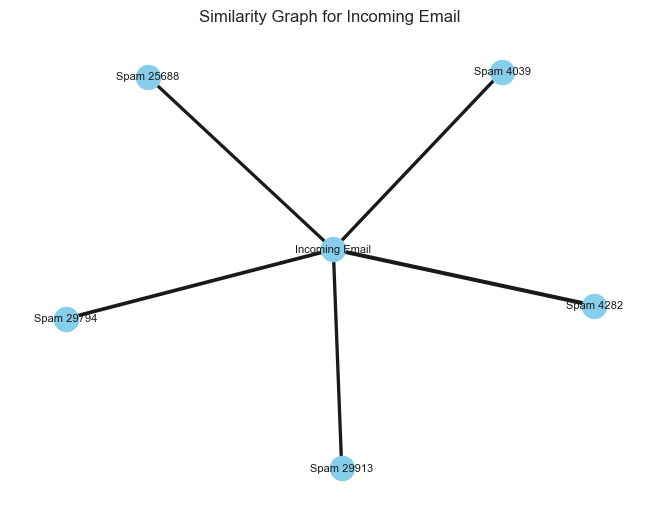

In [133]:
email = "Congratulations! You won a prize. Claim now."

ml, sim, final = final_spam_score(email)

print("ML Probability:", ml)
print("Similarity Score:", sim)
print("Final Weighted Score:", final)

visualize_similarity(email)
